In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from keras.datasets import mnist
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

print("X_train.shape = {}".format(X_train.shape))
print("Y_train.shape = {}".format(Y_train.shape))
print("X_test.shape = {}".format(X_test.shape))
print("Y_test.shape = {}".format(Y_test.shape))

X_train.shape = (60000, 784)
Y_train.shape = (60000,)
X_test.shape = (10000, 784)
Y_test.shape = (10000,)


In [3]:
def model_knn(X, Y):
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(X, Y)

    Y_predict = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_predict)
    return(accuracy)

In [4]:
def random_p(M):
    choose= np.random.choice(len(X_train), M, replace=False)
    return X_train[choose,:], Y_train[choose] 

In [5]:
acc_ran_1000=[]
acc_ran_5000=[]
acc_ran_10000=[]

In [6]:
for i in range(0,4):
    train_X,train_Y=random_p(1000)
    print("X_train.shape = {}".format(train_X.shape))
    print("Y_train.shape = {}".format(train_Y.shape))
    acc=(model_knn(train_X,train_Y))
    print(acc)
    acc_ran_1000.append(acc)

X_train.shape = (1000, 784)
Y_train.shape = (1000,)
0.8816
X_train.shape = (1000, 784)
Y_train.shape = (1000,)
0.8885
X_train.shape = (1000, 784)
Y_train.shape = (1000,)
0.8825
X_train.shape = (1000, 784)
Y_train.shape = (1000,)
0.887


In [7]:
for i in range(0,4):
    train_X,train_Y=random_p(5000)
    print("X_train.shape = {}".format(train_X.shape))
    print("Y_train.shape = {}".format(train_Y.shape))
    acc=model_knn(train_X,train_Y)
    print(acc)
    acc_ran_5000.append(acc)

X_train.shape = (5000, 784)
Y_train.shape = (5000,)
0.9365
X_train.shape = (5000, 784)
Y_train.shape = (5000,)
0.9315
X_train.shape = (5000, 784)
Y_train.shape = (5000,)
0.9319
X_train.shape = (5000, 784)
Y_train.shape = (5000,)
0.9373


In [8]:
for i in range(0,3):
    train_X,train_Y=random_p(10000)
    print("X_train.shape = {}".format(train_X.shape))
    print("Y_train.shape = {}".format(train_Y.shape))
    acc=model_knn(train_X,train_Y)
    print(acc)
    acc_ran_10000.append(acc)

X_train.shape = (10000, 784)
Y_train.shape = (10000,)
0.9487
X_train.shape = (10000, 784)
Y_train.shape = (10000,)
0.9493
X_train.shape = (10000, 784)
Y_train.shape = (10000,)
0.9492


In [9]:
# print(X_train[0])

In [11]:
def kmean_label(m,label,ran):
    label_data=[]
    for i in range(len(Y_train)):
        if Y_train[i]==label:
            label_data.append(X_train[i]) 
    kmeans=KMeans(n_clusters=int(m/10), init='k-means++',random_state=ran).fit(label_data)
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, label_data)
    final_data_label=[]
    for i in closest:
        final_data_label.append([label_data[i],label])
    return(final_data_label)

In [12]:
def kmean(m,ran):
    dataset_points_m=[]
    for j in range(0,10):
        dataset_points_m.extend(kmean_label(m,j,ran))
    return(dataset_points_m)

In [13]:
acc_p_1000=[]
acc_p_5000=[]
acc_p_10000=[]

In [15]:
for i in range(0,4):
    dataset_prototype=(kmean(1000,i))
    print(len(dataset_prototype))
    X_proto=[i[0] for i in dataset_prototype]
    Y_proto=[i[1] for i in dataset_prototype]
    acc=model_knn(X_proto,Y_proto)
    print(acc)
    acc_p_1000.append(acc)

1000
0.926
1000
0.9261
1000
0.9274
1000
0.9288


In [16]:
for i in range(0,4):
    dataset_prototype=(kmean(5000,i))
    print(len(dataset_prototype))
    X_proto=[i[0] for i in dataset_prototype]
    Y_proto=[i[1] for i in dataset_prototype]
    acc=model_knn(X_proto,Y_proto)
    print(acc)
    acc_p_1000.append(acc)

5000
0.9495
5000
0.952
5000
0.9506
5000
0.9509


In [17]:
for i in range(0,3):
    dataset_prototype=(kmean(10000,i))
    print(len(dataset_prototype))
    X_proto=[i[0] for i in dataset_prototype]
    Y_proto=[i[1] for i in dataset_prototype]
    acc=model_knn(X_proto,Y_proto)
    print(acc)
    acc_p_1000.append(acc)

10000
0.9541
10000
0.9555
10000
0.9568


In [18]:
import math
def compute_confidence_interval(accuracy_score, N):
    
    confidence = 1.96 * math.sqrt((accuracy_score * (1 - accuracy_score))/N)
    min_confidence = accuracy_score - confidence
    max_confidence = accuracy_score + confidence

    intervals = (min_confidence, max_confidence)
        
    return intervals

In [24]:
print(compute_confidence_interval(.8849,1000))
print(compute_confidence_interval(.927075,1000))
print(compute_confidence_interval(.9343,1000))

print()
print(compute_confidence_interval(.927075,1000))
print(compute_confidence_interval(.95075,1000))
print(compute_confidence_interval(.9554667,1000))

(0.8651193376050245, 0.9046806623949756)
(0.9109592053403811, 0.9431907946596189)
(0.918943864678377, 0.9496561353216231)

(0.9109592053403811, 0.9431907946596189)
(0.9373380367171692, 0.9641619632828308)
(0.9426815364394441, 0.9682518635605559)


In [43]:
labels = ['1000', '5000', '10000']
x_pos = np.arange(len(labels))
CTEs = [88.49, 93.43, 94.9067]
error = [0.535, 0.481, 0.0798]

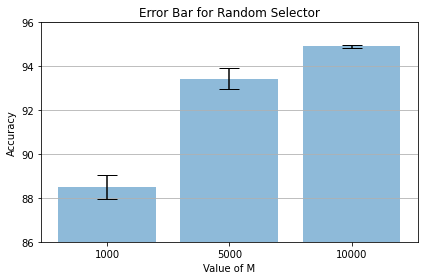

In [44]:
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_xlabel('Value of M')
ax.set_ylabel('Accuracy')
ax.set_ylim([86, 96])
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Error Bar for Random Selector')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [45]:
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline

In [46]:
labels = ['1000', '5000', '10000']
x_pos = np.arange(len(labels))
CTEs = [92.7075, 95.075, 95.546]
error = [0.2092,0.4812,0.0798]

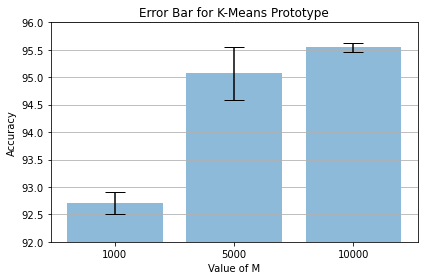

In [47]:
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_xlabel('Value of M')
ax.set_ylabel('Accuracy')
ax.set_ylim([92, 96])
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Error Bar for K-Means Prototype')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()